In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Reading the Dataset
df = pd.read_csv('data/StudentsPerformance.csv')

## Printing first 10 rows of dataframe
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


## EDA

In [3]:
## Checking for missing values

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
## Checking for duplicates

df.duplicated().sum()

0

In [5]:
## Concise statistical summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
## Inspecting column names/misspelled
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
# Rename specified columns in the DataFrame
df = df.rename(columns={
    'race/ethnicity': 'race_ethnicity',
    'parental level of education': 'parental_level_of_education',
    'test preparation course': 'test_preparation_course',
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score'
})

# Display the updated column names
df.columns


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [8]:
## Discriptive Summary of numerical features of a dataset

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights
- Means for all three scores are relatively close (66.09 for math, 69.17 for reading, and 68.05 for writing), indicating that, on average, students perform similarly across these subjects.
- The medians (50th percentile) are also close to the mean values, suggesting a somewhat symmetrical distribution around the mean for each score.
- The minimum values (0 for math, 17 for reading, and 10 for writing) are significantly lower than the first quartile (25th percentile) in each subject. This indicates that some students may have scores much lower than the rest, likely qualifying as outliers.
- Outliers on the lower end could impact the mean, pulling it down slightly, especially in subjects like math.

## EDA Continued

In [9]:
# Print unique categories in the 'gender' column of the DataFrame
print(f'Categories in gender column: {df["gender"].unique()}')

# Print unique categories in the 'race/ethnicity' column of the DataFrame
print(f'\nCategories in race/ethnicity column: {df["race_ethnicity"].unique()}')

# Print unique categories in the 'parental level of education' column of the DataFrame
print(f'\nCategories in parental level of education: {df["parental_level_of_education"].unique()}')

# Print unique categories in the 'lunch' column of the DataFrame
print(f'\nCategories in lunch column: {df["lunch"].unique()}')

# Print unique categories in the 'test preparation course' column of the DataFrame
print(f'\nCategories in test preparation course column: {df["test_preparation_course"].unique()}')


Categories in gender column: ['female' 'male']

Categories in race/ethnicity column: ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in lunch column: ['standard' 'free/reduced']

Categories in test preparation course column: ['none' 'completed']


In [10]:
## Inspecting number of numerical features in the dataset

numerical_features = [col for col in df.columns if df[col].dtype != 'O']

## Inspecting the number of categorical features in the dataset

categorical_features = [col for col in df.columns if df[col].dtype == 'O']

print(f'There are {len(numerical_features)} in numerical features in the dataset')
print(f'Thre are {len(categorical_features)} categorical features in the dataset')

There are 3 in numerical features in the dataset
Thre are 5 categorical features in the dataset


## Feature Engineering

In [11]:
# Create a new column 'total_scores' by summing the 'math_score', 'reading_score', and 'writing_score' columns
df['total_scores'] = df['math_score'] + df['reading_score'] + df['writing_score']

# Create a new column 'average_scores' by dividing 'total_scores' by 3 to get the average of the three scores
df['average_scores'] = df['total_scores'] / 3

# Display the first few rows of the DataFrame to check the new columns
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_scores,average_scores
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
# Count the number of students who scored full marks (100) in 'math_score' by filtering and counting 'average_scores'
math_full = df[df['math_score'] == 100]['average_scores'].count()

# Count the number of students who scored full marks (100) in 'reading_score' by filtering and counting 'average_scores'
reading_full = df[df['reading_score'] == 100]['average_scores'].count()

# Count the number of students who scored full marks (100) in 'writing_score' by filtering and counting 'average_scores'
writing_full = df[df['writing_score'] == 100]['average_scores'].count()

# Print the number of students with full marks in each subject
print(f'Number of people with full marks in Maths: {math_full}')
print(f'Number of people with full marks in Reading: {reading_full}')
print(f'Number of people with full marks in Writing: {writing_full}')


Number of people with full marks in Maths: 7
Number of people with full marks in Reading: 17
Number of people with full marks in Writing: 14


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


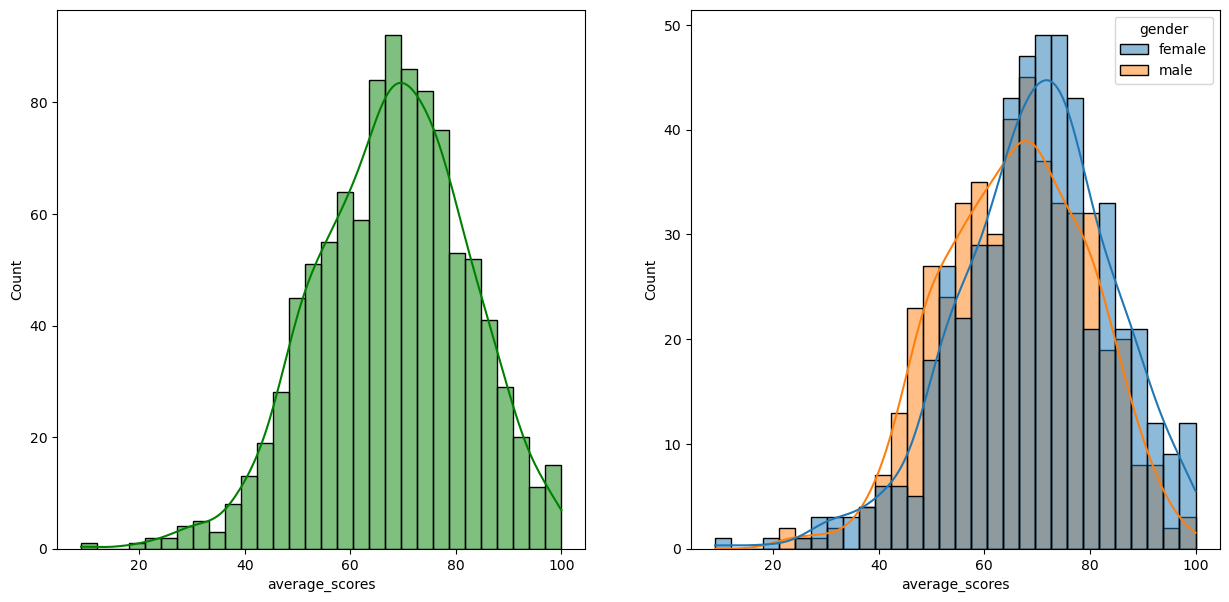

In [13]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_scores',kde=True,bins=30,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_scores',kde=True,bins=30,hue='gender')
plt.show()

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


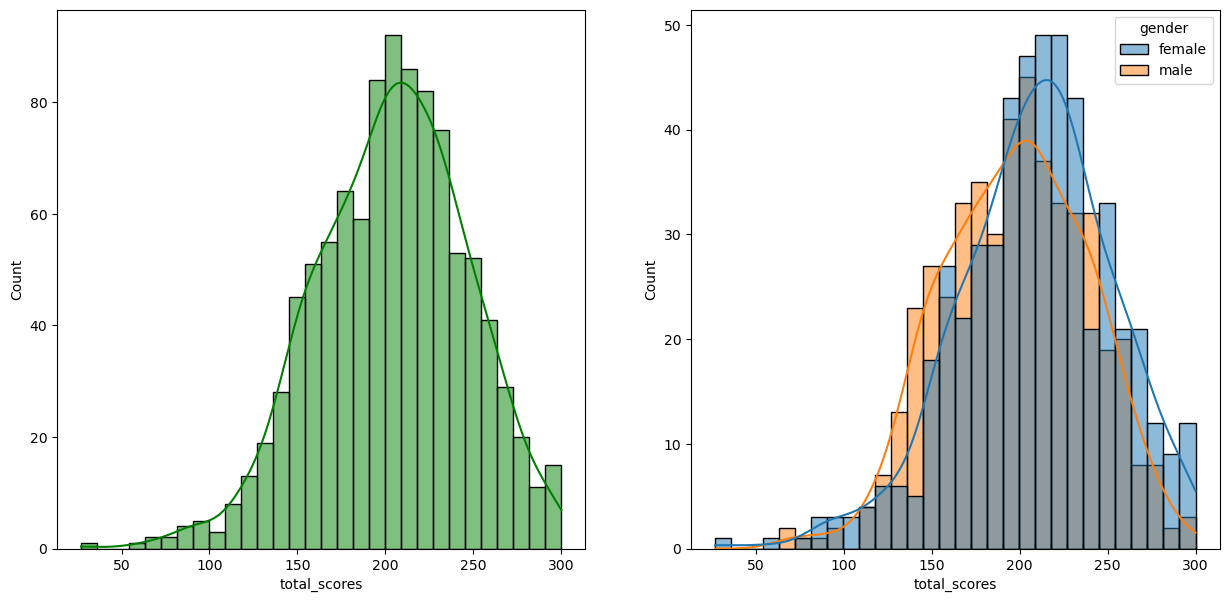

In [14]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_scores',kde=True,bins=30,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_scores',kde=True,bins=30,hue='gender')
plt.show()

## Insights
- Females tend to perform better than male

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


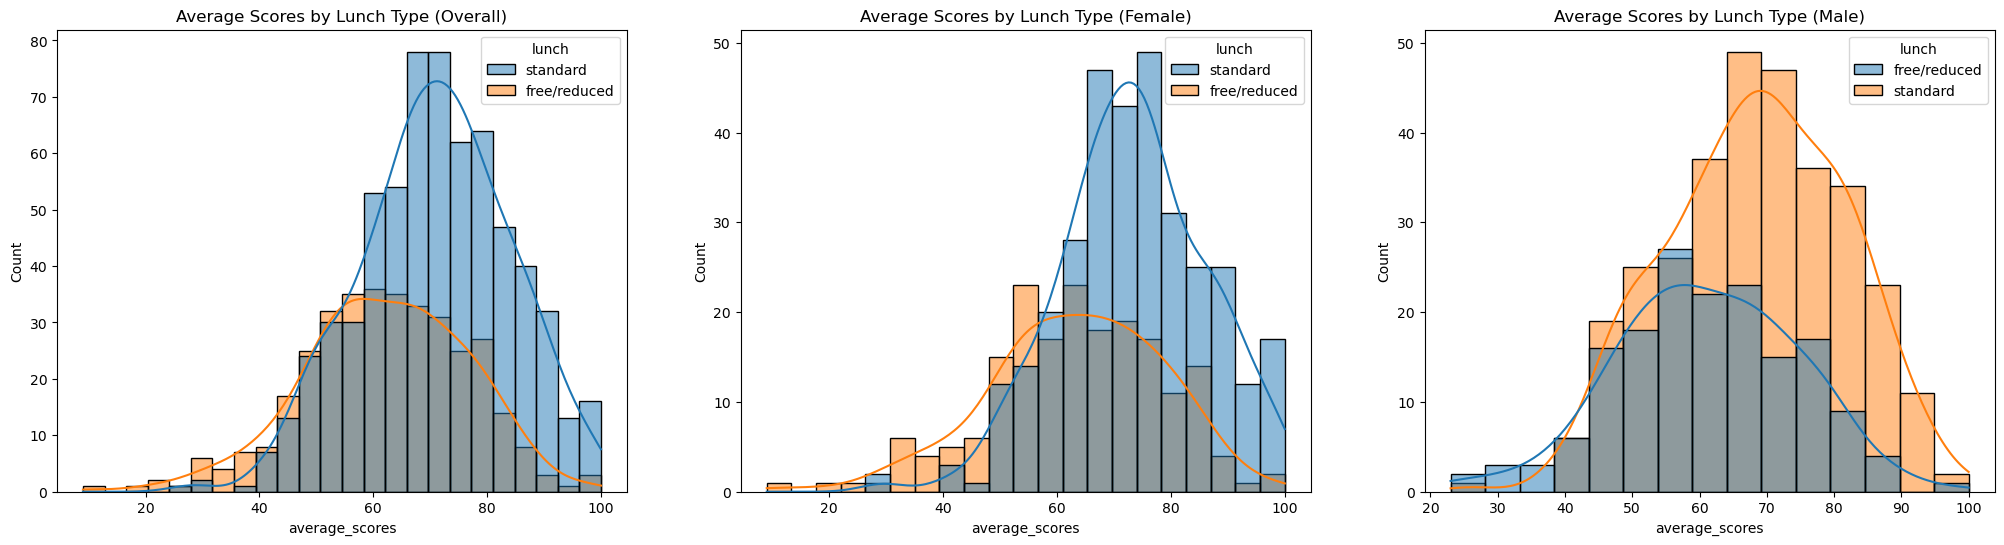

In [15]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_scores',kde=True,hue='lunch')
plt.title('Average Scores by Lunch Type (Overall)')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'],x='average_scores',kde=True,hue='lunch')
plt.title('Average Scores by Lunch Type (Female)')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'],x='average_scores',kde=True,hue='lunch')
plt.title('Average Scores by Lunch Type (Male)')
plt.show()


## Insights
- From above visualization we can infer that Standard Diet helps perform better in exams let it be male or female. Students with standard lunches generally have higher average scores, as their distribution is centered around 70-80, with a visible peak in this range.
- Students with free/reduced lunches tend to score lower on average, with their distribution peaking around 50-60.
- This suggests a correlation between lunch type and academic performance, where students with standard lunches perform better on average.

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

<Figure size 1800x1000 with 0 Axes>

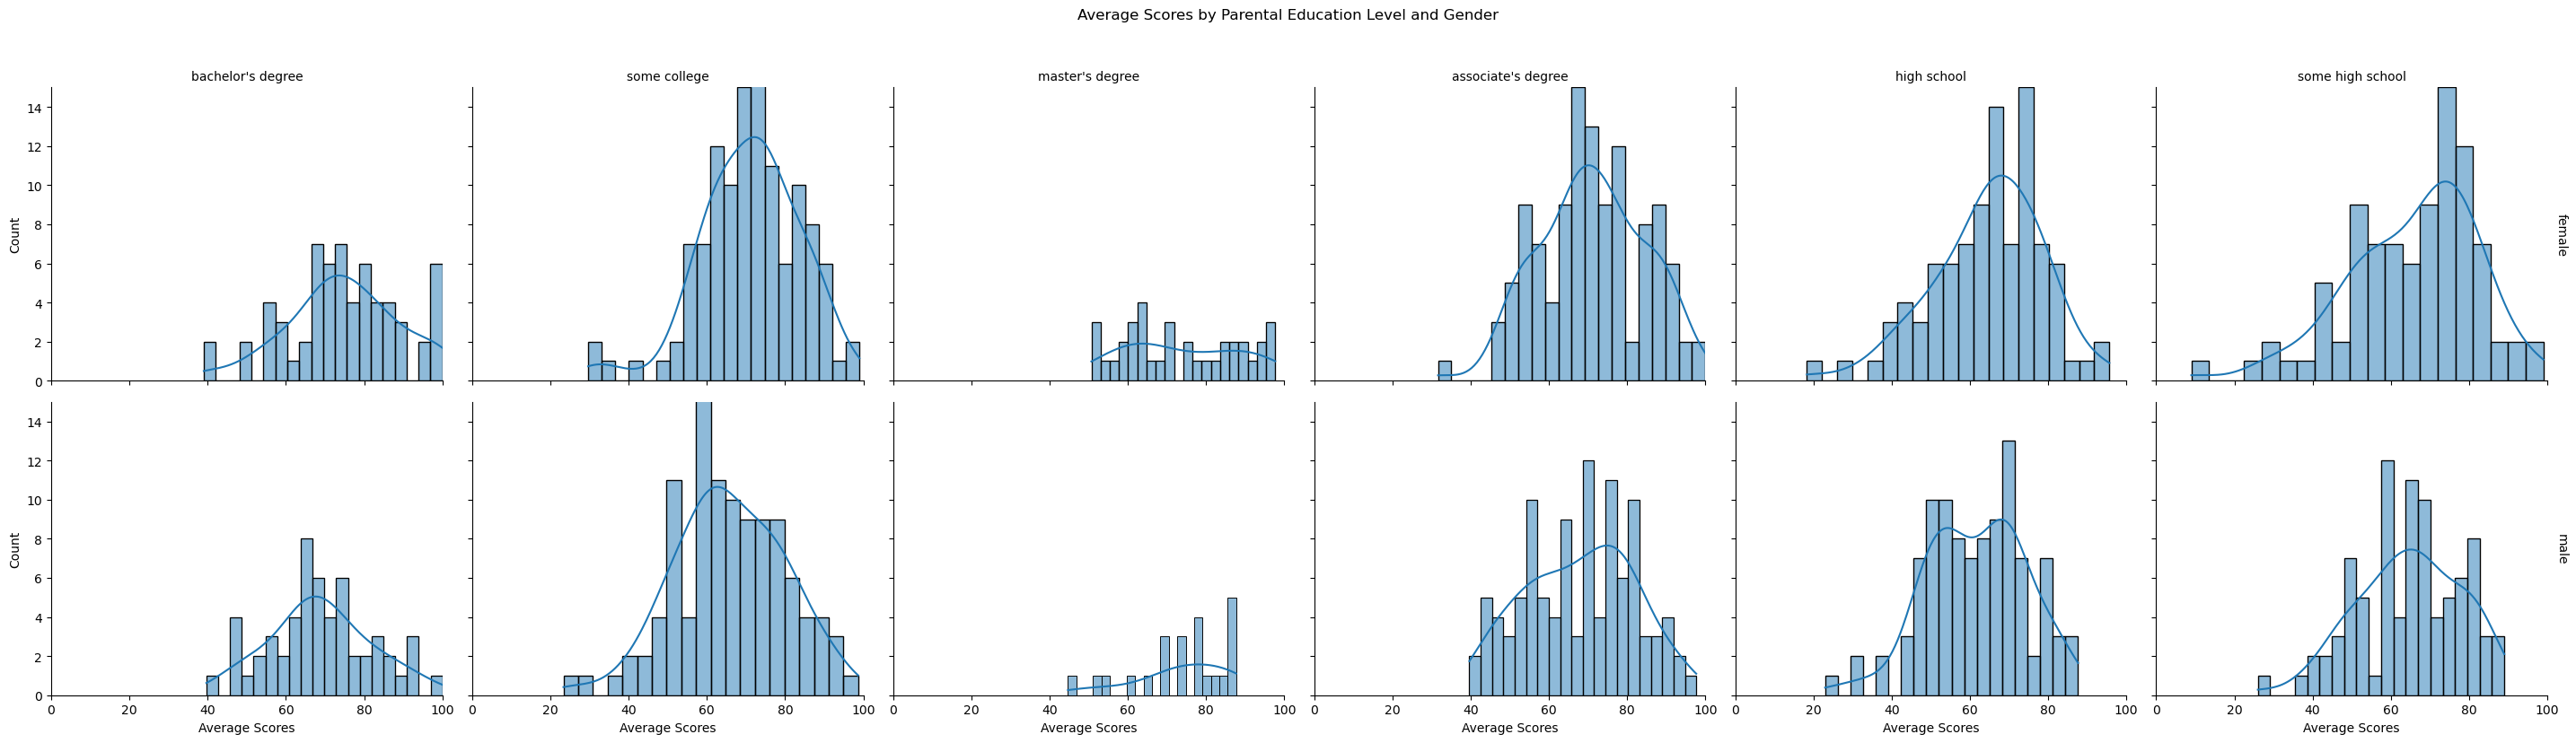

In [16]:
# Set the plot size for better visibility
plt.figure(figsize=(18, 10))

# Use Seaborn's FacetGrid to create a grid of plots based on 'parental_level_of_education' categories
g = sns.FacetGrid(df, col="parental_level_of_education", row="gender", height=4, aspect=1.2, margin_titles=True, sharey=True, sharex=True)

# Plot histogram with KDE overlay for each combination
g.map(sns.histplot, "average_scores", kde=True, bins=20)

# Set the overall x and y-axis limits for consistency across all subplots
g.set(xlim=(0, 100), ylim=(0, df['average_scores'].value_counts().max()))

# Set titles and labels
g.fig.suptitle("Average Scores by Parental Education Level and Gender", y=1.03)
g.set_axis_labels("Average Scores", "Count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Display the plots
plt.tight_layout()
plt.show()


## Insights
- Students with parents who have higher education levels (e.g., Bachelor's or Master's degrees) tend to have higher average scores overall.
- This trend is visible in both genders, though there is a slightly stronger concentration of higher scores in females compared to males in the Bachelor's and Master's degree categories.
- Parental education seems to have a noticeable impact on student performance, as higher parental education is associated with higher student scores. This trend could indicate that parents with higher education may have more resources, knowledge, or time to support their children's education.

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


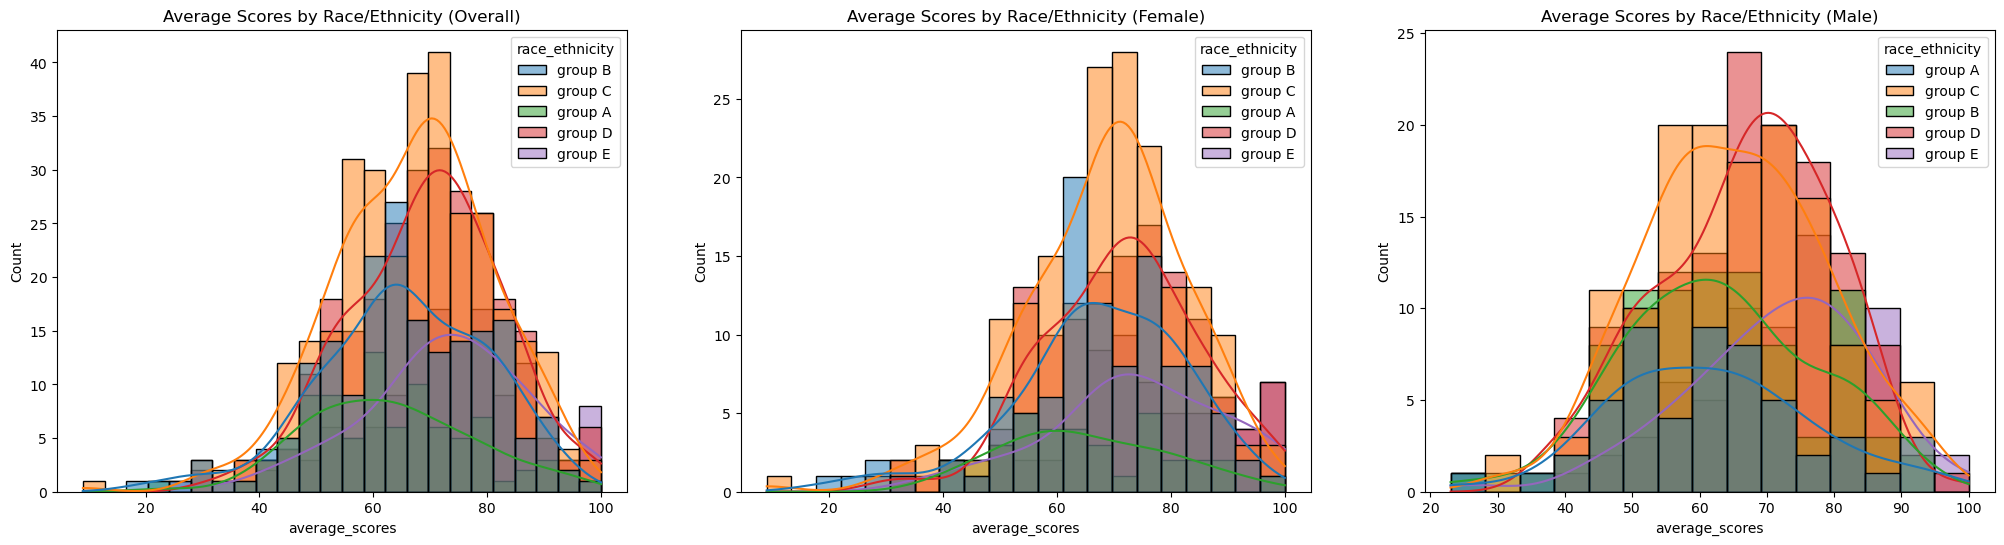

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_scores',kde=True,hue='race_ethnicity')
plt.title('Average Scores by Race/Ethnicity (Overall)')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'],x='average_scores',kde=True,hue='race_ethnicity')
plt.title('Average Scores by Race/Ethnicity (Female)')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'],x='average_scores',kde=True,hue='race_ethnicity')
plt.title('Average Scores by Race/Ethnicity (Male)')
plt.show()


## Insights
1. **Group C** generally performs best, especially females scoring between 60-80.
2. **Groups A and B** have more students with lower scores (30-60), suggesting academic challenges.
3. **Group E** has fewer students but includes high achievers (80-100).
4. **Gender Differences**: Females in Groups C and D tend to score slightly higher than males.
5. **Support Implications**: Groups A and B may benefit from additional academic support.

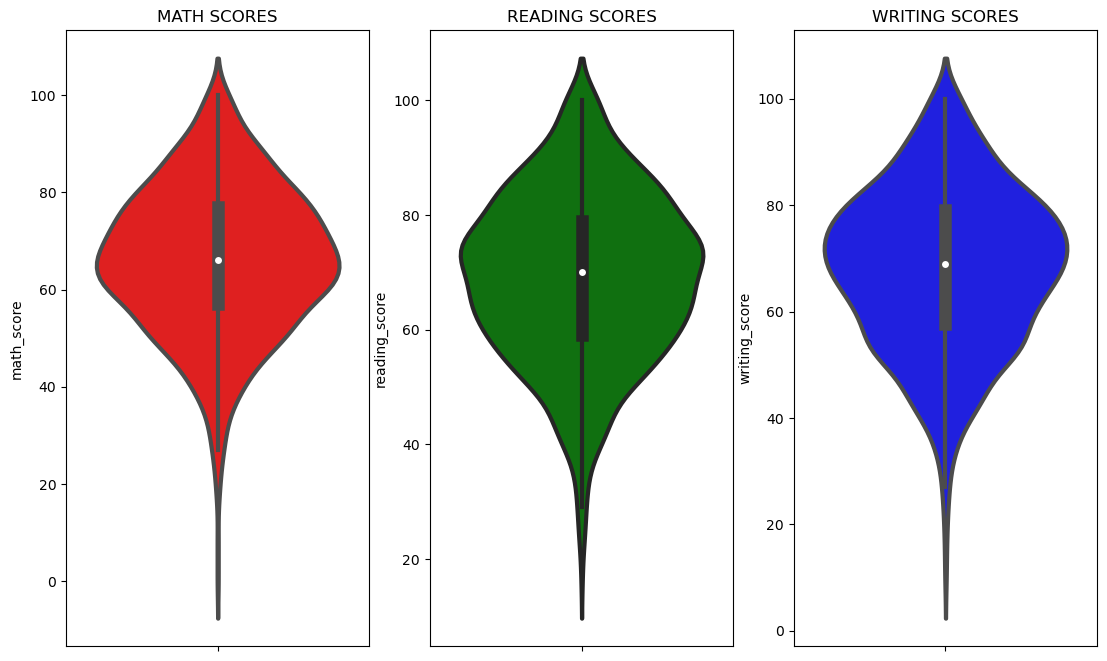

In [18]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

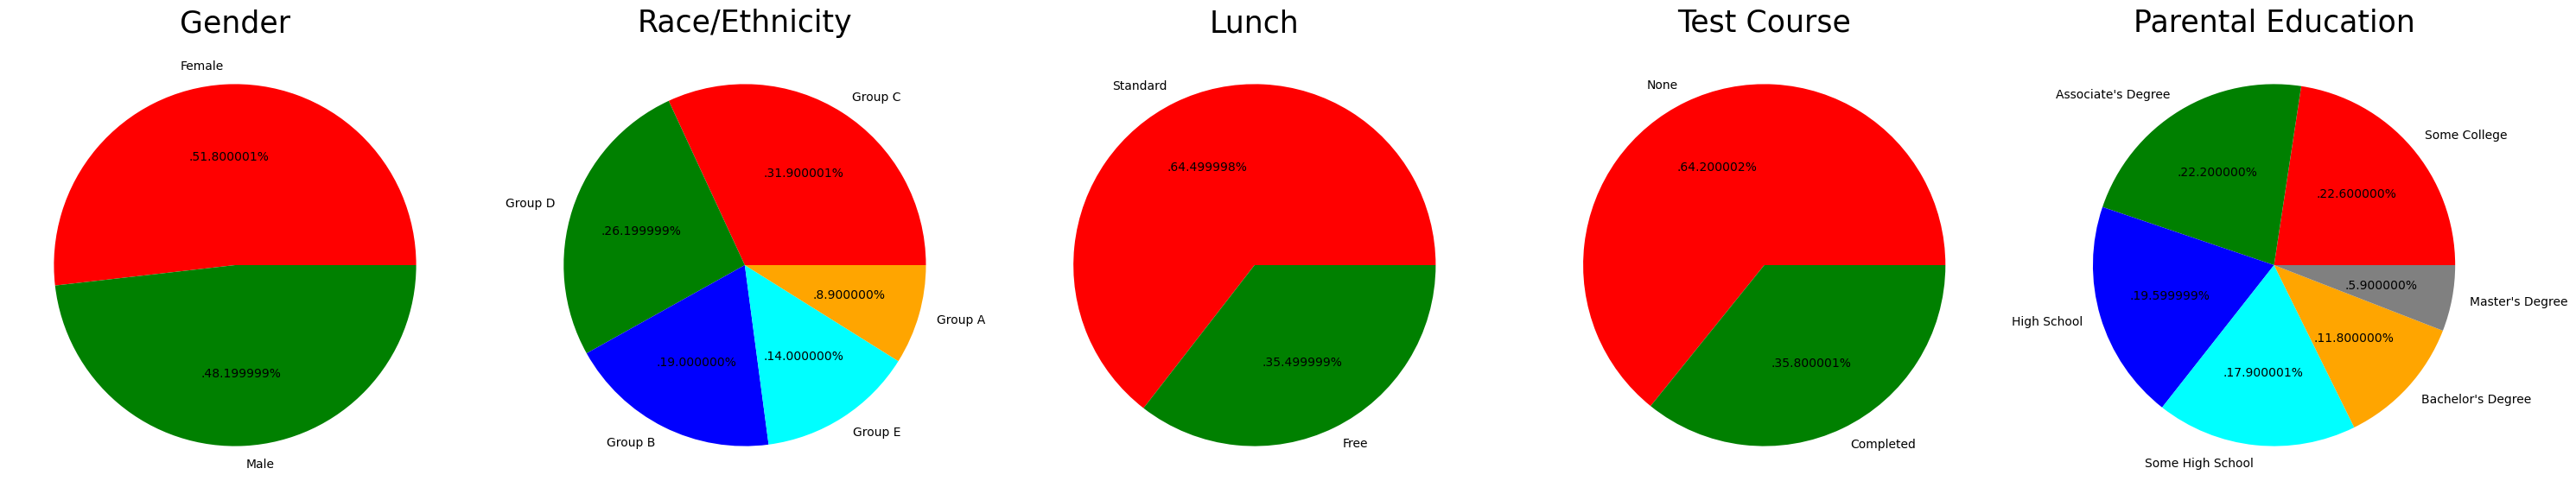

In [19]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 25)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 25)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 25)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 25)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 25)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

## Insights
- Number of Female and Male students are roughly equal
- Number of students from group-c ethnicity are dominated
- Most Students have standard lunch
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

<b>Univariate Analysis (How is Distribution over Gender)</b>

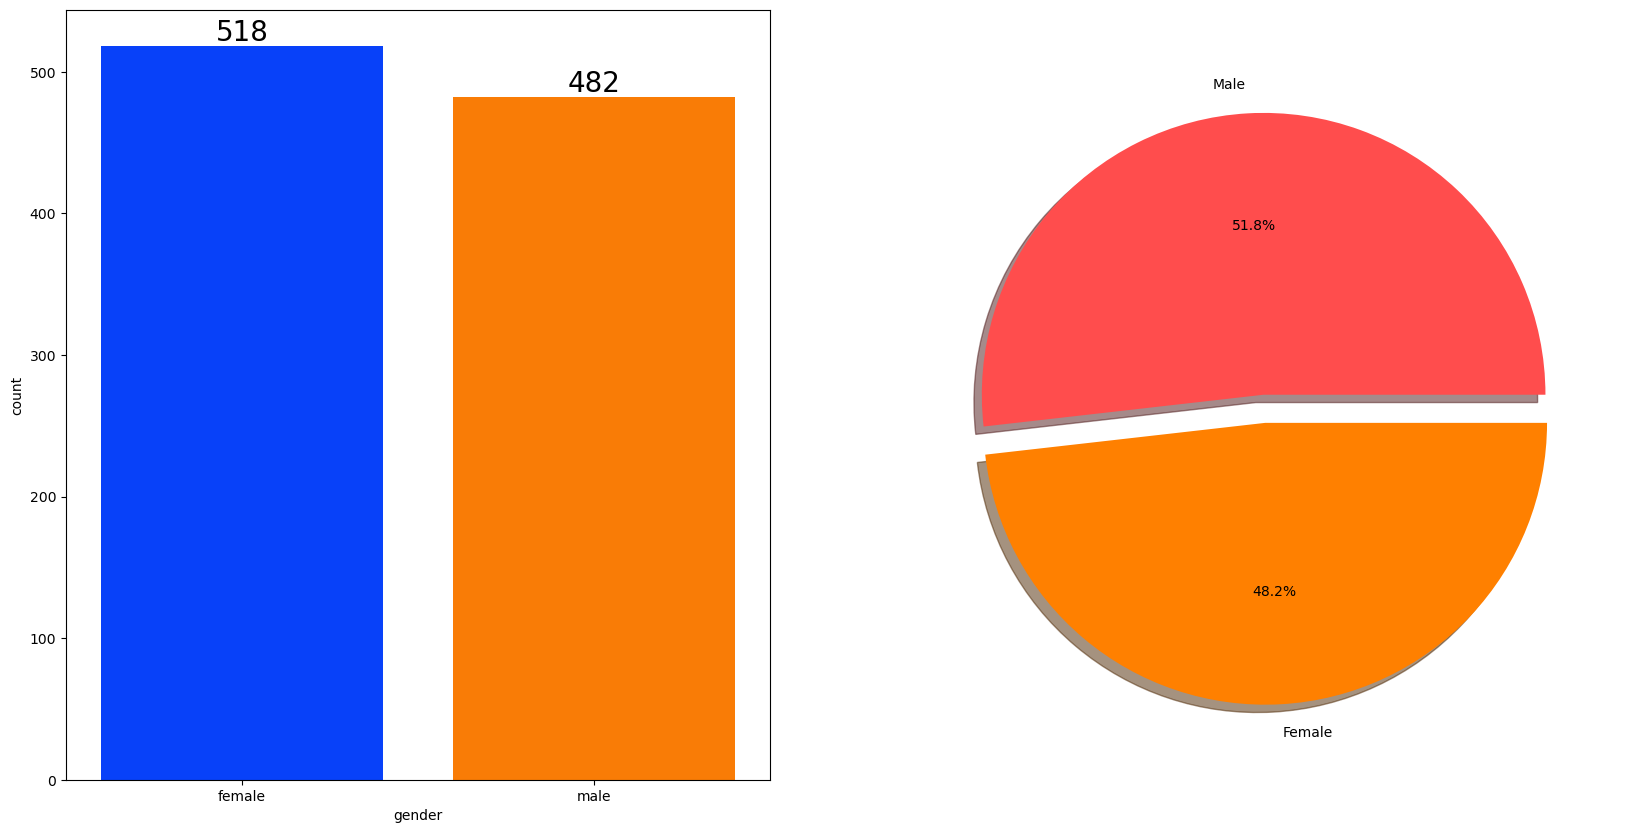

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

## Insights
- Gender has almost a balanced data with 48.2 percentage of Female and 51.8 percentage of Males

<b>Bivariate Analysis (Does Gender has any influence over student's performance)</b>

In [21]:
gender_group = df.groupby('gender')[['math_score', 'reading_score', 'writing_score','average_scores']].mean()
gender_group

,math_score,reading_score,writing_score,average_scores
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


C:\Users\ABDULLAH RIZWAN\AppData\Local\Temp\ipykernel_22868\2308441006.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_scores = [gender_group['average_scores'][0], gender_group['math_score'][0]]
C:\Users\ABDULLAH RIZWAN\AppData\Local\Temp\ipykernel_22868\2308441006.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_scores = [gender_group['average_scores'][1], gender_group['math_score'][1]]


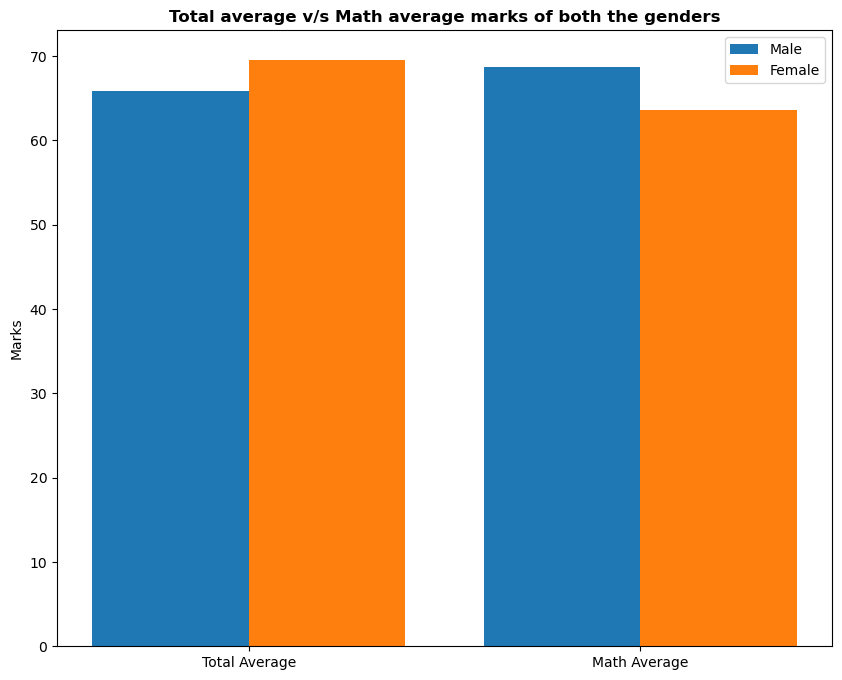

In [22]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_scores'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_scores'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

## Insight
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

<b>UNIVARIATE ANALYSIS ( How is Group wise distribution ?)</b>

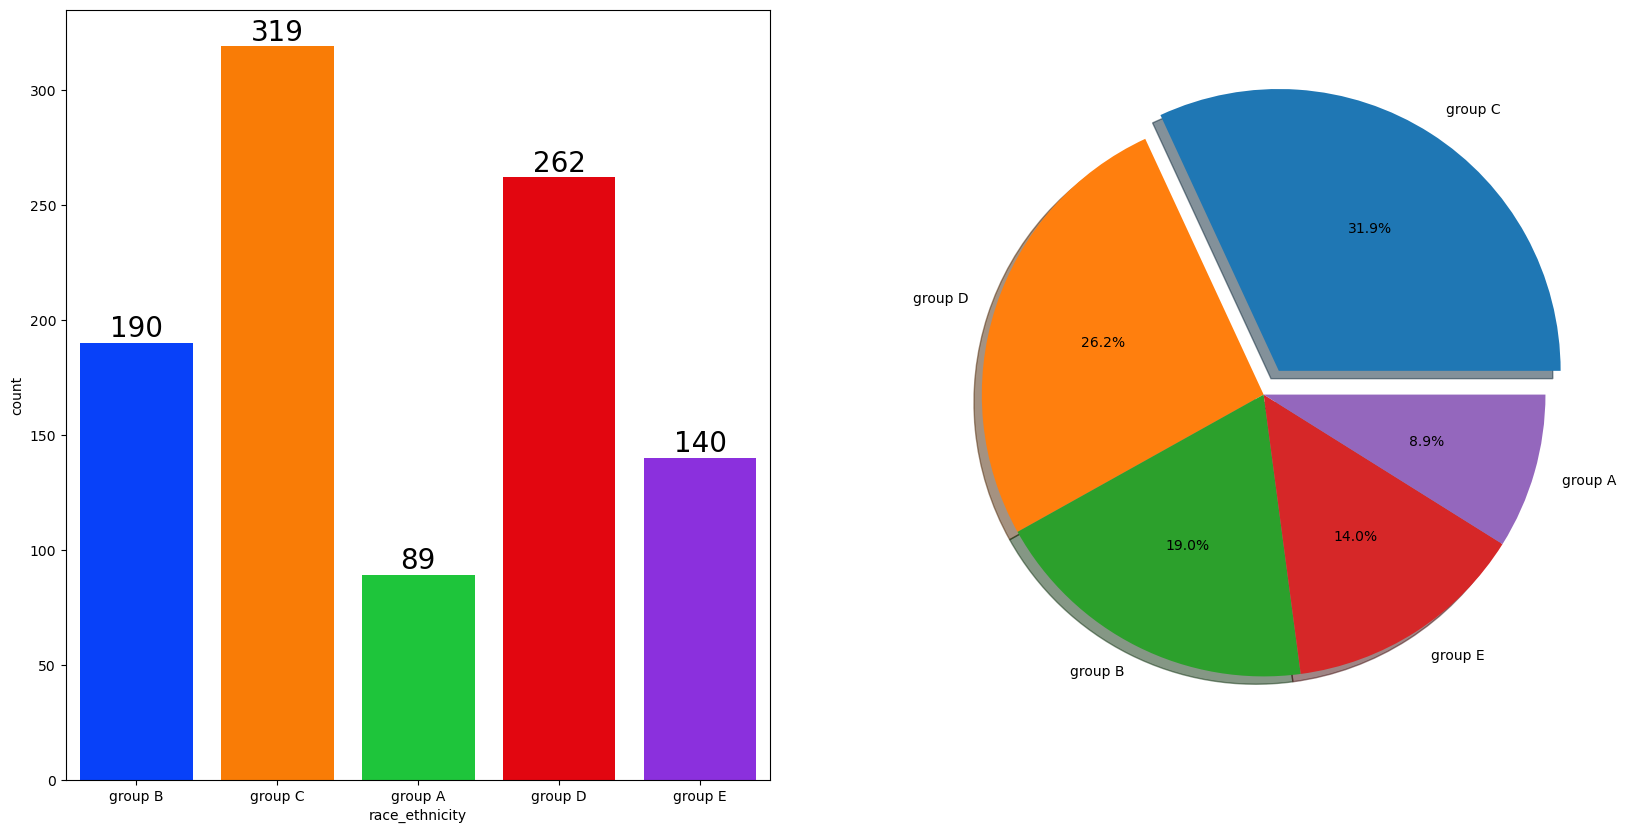

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

## Insights
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

<b>BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )</b>

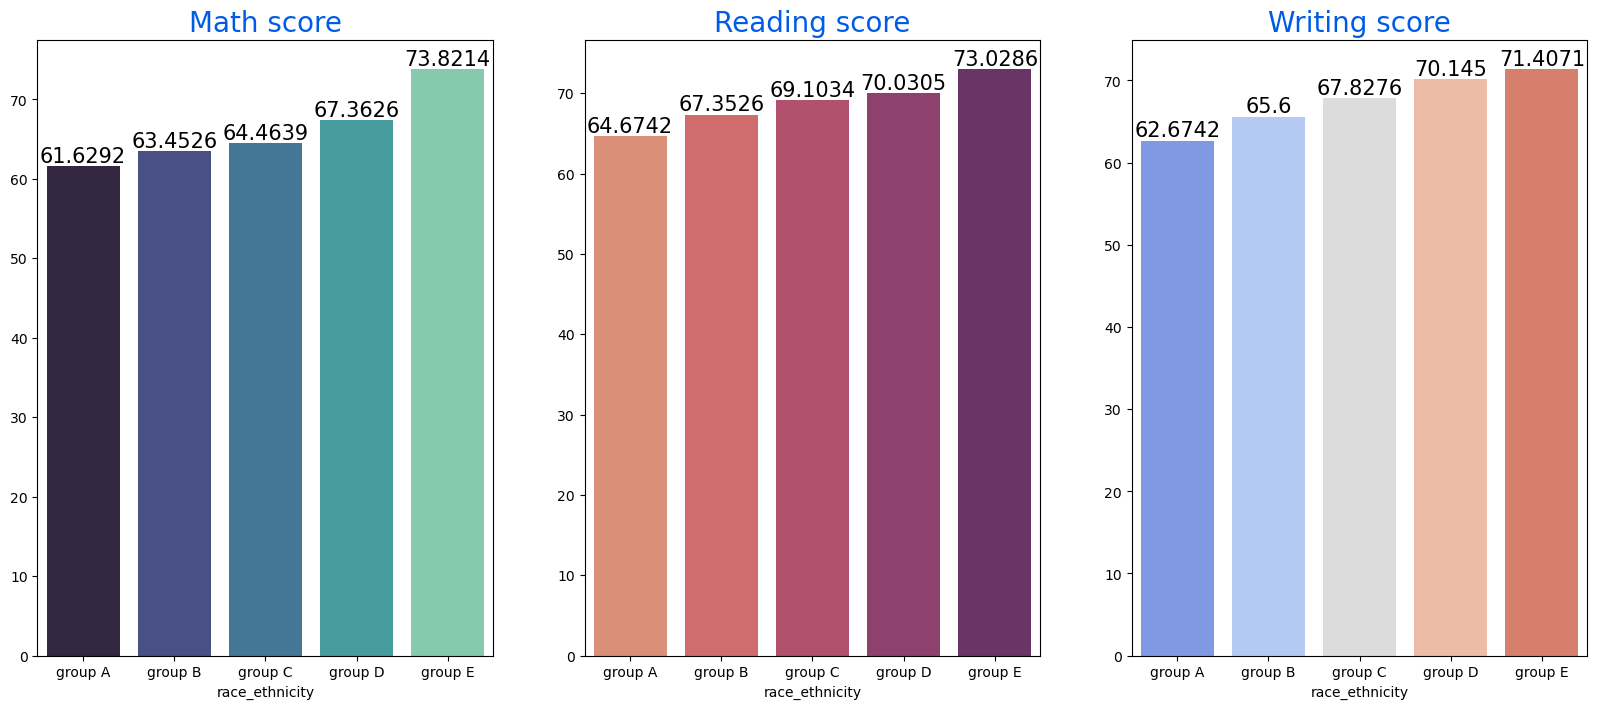

In [24]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

## Insights
- <b>Math scores:</b> Group A has the lowest score, while Group E has the highest score.
- <b>Reading scores:</b> Group C has the highest score, while Group A has the lowest score.
- <b>Writing scores:</b> Group E has the highest score, while Group A has the lowest score.
- <b>Overall:</b> Group E seems to have the highest scores across all three subjects, while Group A consistently has the lowest scores.
- <b>Disparity:</b> There is a noticeable disparity in scores between the different groups, particularly in Math.


<b>UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )</b>

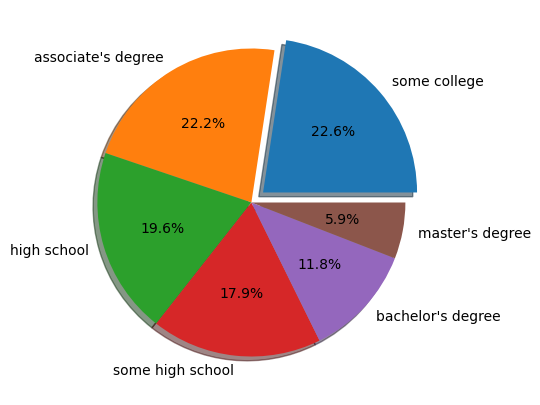

In [25]:
# Set up the figure size
fig, ax = plt.subplots(figsize=(5, 5))  # Adjust the size as needed

# Create the pie chart on the specified axes
ax.pie(x=df['parental_level_of_education'].value_counts(),
       labels=df['parental_level_of_education'].value_counts().index,
       explode=[0.1, 0, 0, 0, 0, 0],
       autopct='%1.1f%%',
       shadow=True)

# Display the chart
plt.show()


## Insights
- From above visual we can infer that majority of student's parents have got `some college degree`

<b>BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )</b>

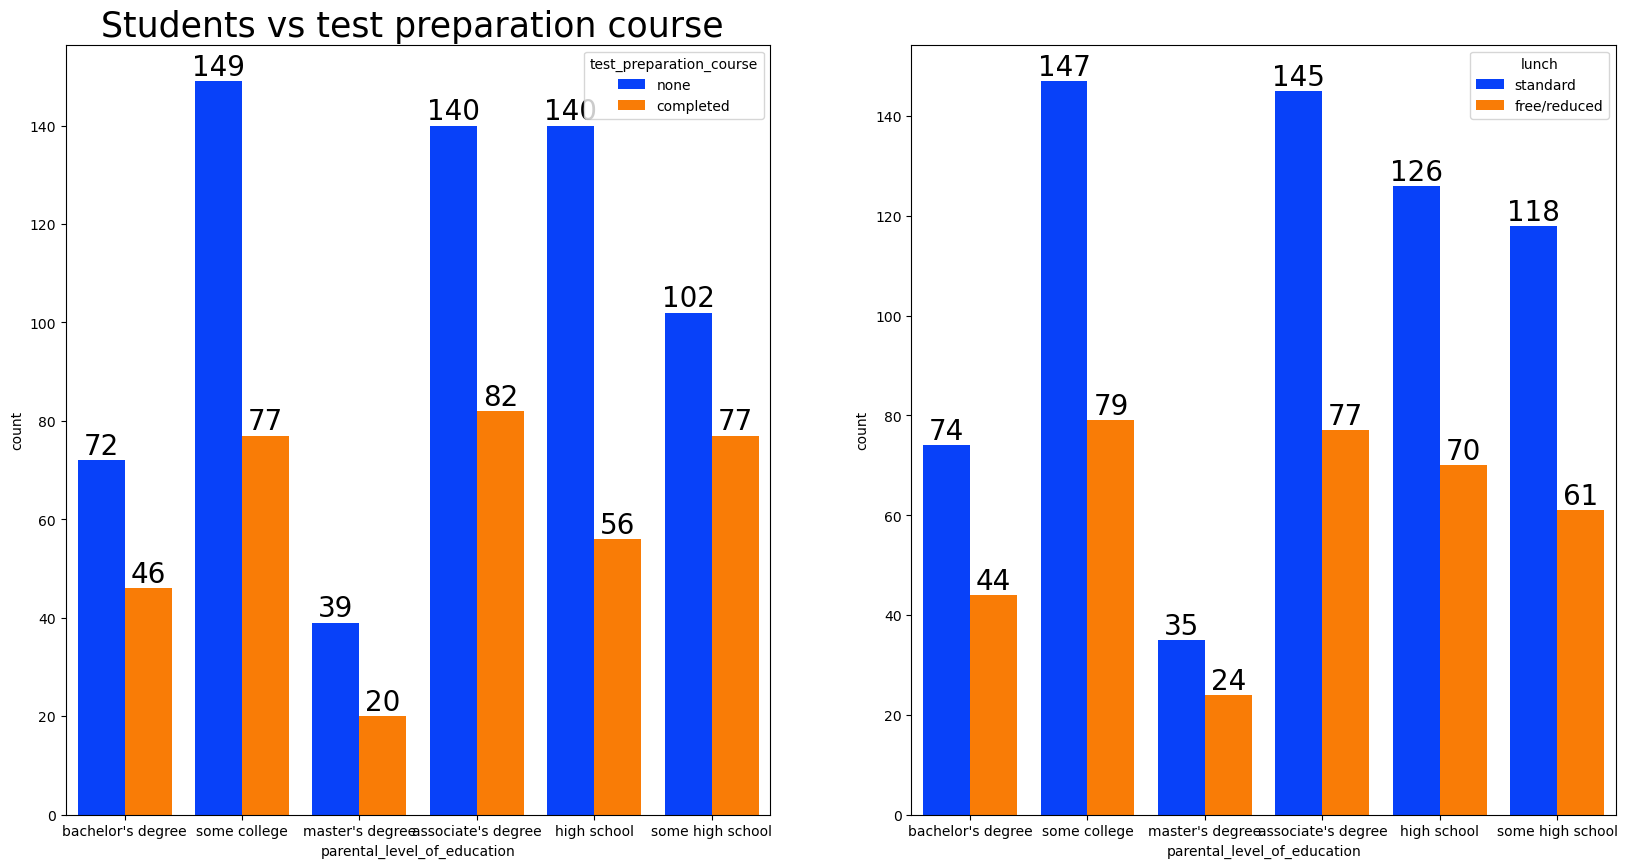

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

## Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

### TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

<B>BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )</B>


<Axes: xlabel='lunch', ylabel='writing_score'>

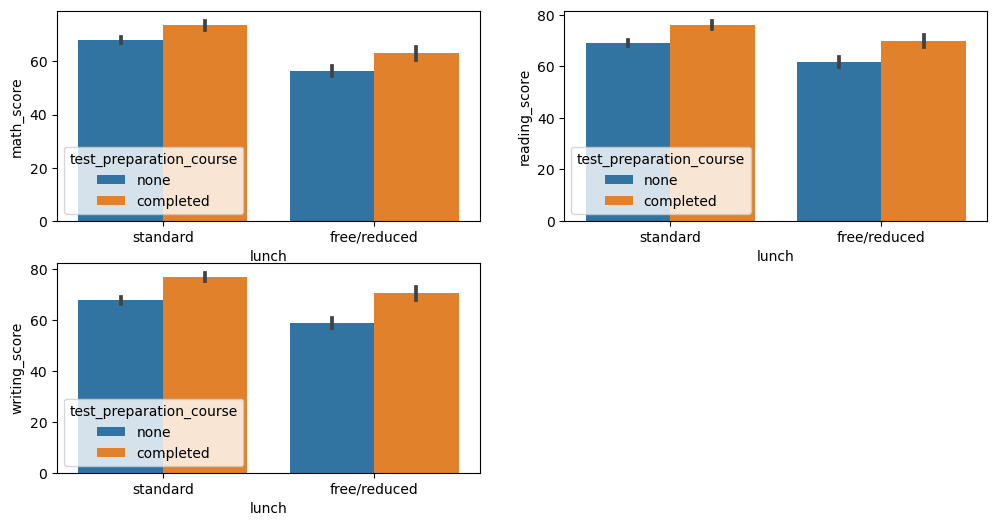

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

## Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

## Checking Outliers

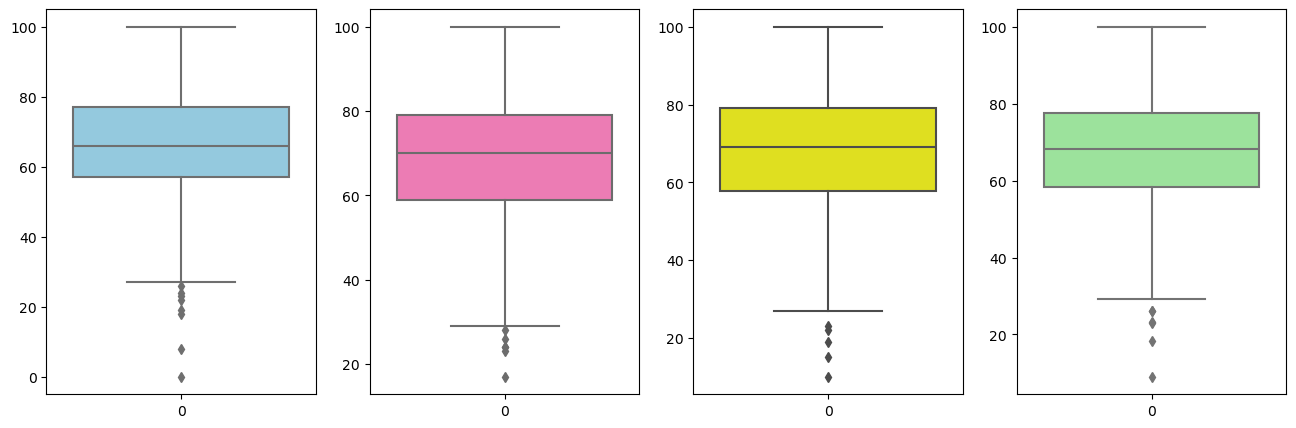

In [30]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_scores'],color='lightgreen')
plt.show()

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

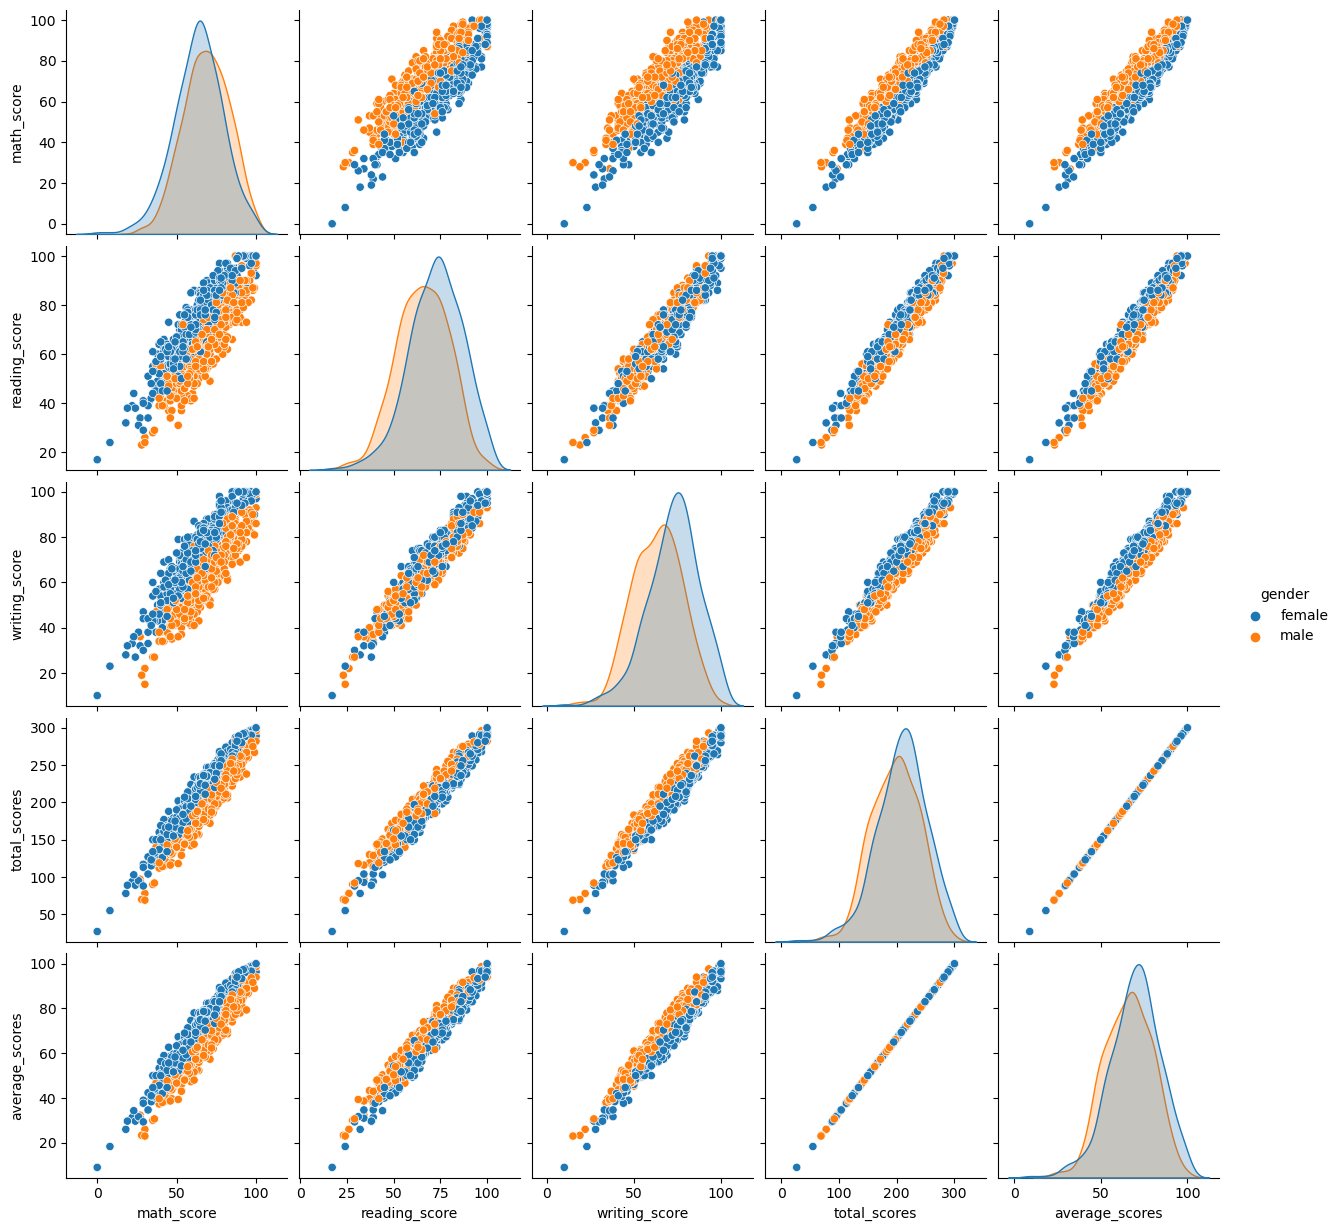

In [31]:
sns.pairplot(df,hue = 'gender')
plt.show()

## Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

In [32]:
df.to_csv('cleaned_dataset',index=False)